# Support Vector Machines

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns; sns.set()

In [2]:
from sklearn.datasets.samples_generator import make_blobs

In [3]:
X, Y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.6)

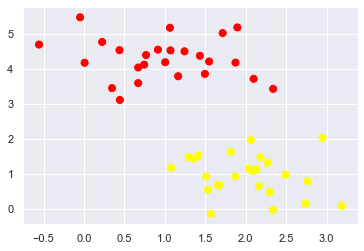

In [4]:
plt.scatter(X[:,0], X[:,1], c=Y, s=50, cmap="autumn")

(-1, 3.5)

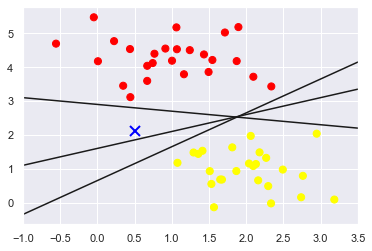

In [9]:
xx = np.linspace(-1, 3.5)
plt.scatter(X[:,0], X[:,1], c=Y, s=50, cmap="autumn")
plt.plot([0.5], [2.1], 'x', color="blue", markeredgewidth=2, markersize=10)

for a, b in [(1,0.65), (0.5, 1.6), (-0.2, 2.9)]:
    yy=a*xx+b
    plt.plot(xx, yy, "-k")
    
plt.xlim(-1,3.5)

## Maximización del margen

(-1, 3.5)

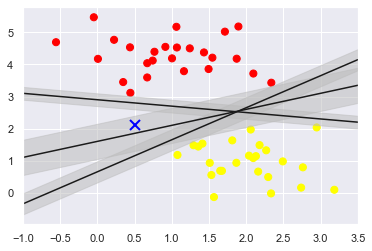

In [11]:
xx = np.linspace(-1, 3.5)
plt.scatter(X[:,0], X[:,1], c=Y, s=50, cmap="autumn")
plt.plot([0.5], [2.1], 'x', color="blue", markeredgewidth=2, markersize=10)

for a, b, d in [(1,0.65,0.33), (0.5, 1.6,0.55), (-0.2, 2.9,0.2)]:
    yy=a*xx+b
    plt.plot(xx, yy, "-k")
    plt.fill_between(xx, yy-d, yy+d, edgecolor="none", color="#BBBBBB", alpha=0.5)
    
plt.xlim(-1,3.5)

## Creación del modelo SVM

In [12]:
from sklearn.svm import SVC

In [13]:
model = SVC(kernel="linear", C=1E10)
model.fit(X,Y)

SVC(C=10000000000.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [21]:
def plt_svc(model, ax=None, plot_support=True):
    """Plot de la función de decisión para una clasificación en 2D con SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # Generamos la parrilla de puntos para evaluar el modelo
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(yy,xx)
    
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # Representamos las fronteras y los márgenes del SVC
    ax.contour(X,Y,P,colors="k", levels=[-1,0,1], alpha=0.5, linestyles=["--","-", "--"])
    
    print(model.support_vectors_)
    if plot_support:
        ax.scatter(model.support_vectors_[:,0],
                  model.support_vectors_[:,1],
                  s=300, linewidth=1, facecolors="black")
        
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

[[0.44359863 3.11530945]
 [2.33812285 3.43116792]
 [2.06156753 1.96918596]]


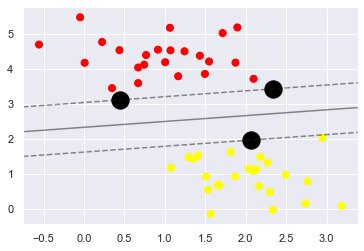

In [22]:
plt.scatter(X[:,0], X[:,1], c=Y, s=50, cmap="autumn")
plt_svc(model)

In [23]:
def plot_svm(N=10, ax=None):
    X, Y = make_blobs(n_samples=200, centers=2, random_state=0, cluster_std=0.6)
    
    X = X[:N]
    Y = Y[:N]
    model = SVC(kernel="linear", C=1E10)
    model.fit(X,Y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:,0], X[:,1], c=Y, s=50, cmap="autumn")
    ax.set_xlim(-1,4)
    ax.set_ylim(-1,6)
    plt_svc(model, ax)
    

[[0.44359863 3.11530945]
 [1.25566754 3.38204112]
 [0.83685684 2.13635938]]
[[0.44359863 3.11530945]
 [1.25566754 3.38204112]
 [0.83685684 2.13635938]]


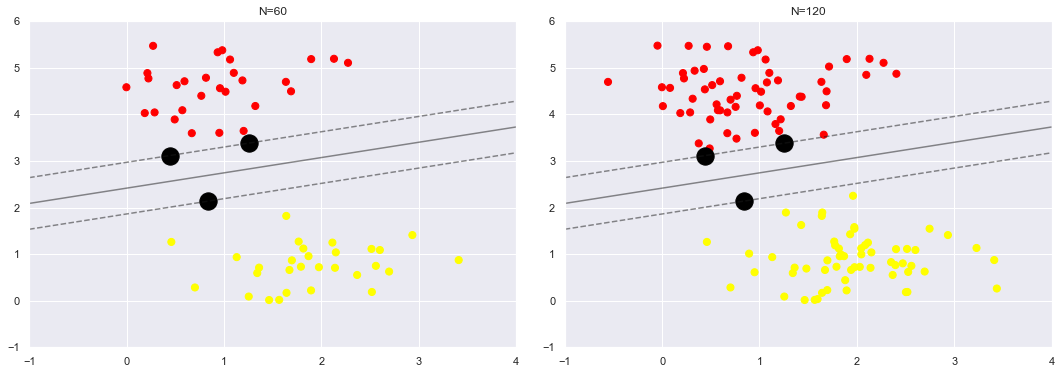

In [24]:
fig, ax = plt.subplots(1,2, figsize=(16,6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for ax_i, N, in zip(ax, [60,120]):
    plot_svm(N,ax_i)
    ax_i.set_title("N={0}".format(N))

In [25]:
from ipywidgets import interact, fixed

In [26]:
interact(plot_svm, N=[10,200], ax=fixed(None))

interactive(children=(Dropdown(description='N', options=(10, 200), value=10), Output()), _dom_classes=('widget…

<function __main__.plot_svm(N=10, ax=None)>